# 3) 1D CNN으로 IMDB 리뷰 분류하기
## 1. 데이터에 대한 전처리

In [2]:
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# 최대 10000개의 단어만을 허용하여 데이터를 로드
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=vocab_size)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
print(x_train[:5])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [5]:
# 패딩을 진행하여 모든 샘플들의 길이를 200으로 맞춤
max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [6]:
# 패딩이 되었는지 크기(shape) 확인
print('x_train의 크기(shape) :', x_train.shape)
print('x_test의 크기(shape) :', x_test.shape)

x_train의 크기(shape) : (25000, 200)
x_test의 크기(shape) : (25000, 200)


In [7]:
print(y_train[:5])

[1 0 0 1 0]


## 2. 1D CNN으로 IMDB 리뷰 분류하기

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 256    # 임베딩 벡터의 차원
dropout_ratio = 0.3    # 드롭아웃 비율
num_filters = 256    # 커널의 수
kernel_size = 3    # 커널의 크기
hidden_units = 128    # 뉴런의 수

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[es, mc])

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 0.3961 - acc: 0.8091
Epoch 00001: val_acc improved from -inf to 0.87968, saving model to best_model.h5
782/782 [==============================] - 225s 284ms/step - loss: 0.3961 - acc: 0.8091 - val_loss: 0.2883 - val_acc: 0.8797
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 0.2044 - acc: 0.9221
Epoch 00002: val_acc improved from 0.87968 to 0.88444, saving model to best_model.h5
782/782 [==============================] - 214s 273ms/step - loss: 0.2044 - acc: 0.9221 - val_loss: 0.2760 - val_acc: 0.8844
Epoch 3/20
782/782 [==============================] - ETA: 0s - loss: 0.0925 - acc: 0.9684
Epoch 00003: val_acc improved from 0.88444 to 0.88712, saving model to best_model.h5
782/782 [==============================] - 244s 312ms/step - loss: 0.0925 - acc: 0.9684 - val_loss: 0.3244 - val_acc: 0.8871
Epoch 4/20
782/782 [==============================] - ETA: 0s - loss: 0.0380 - acc: 0.9875
Epoch 000

In [12]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도 : %.4f"%(loaded_model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 36s 45ms/step - loss: 0.3244 - acc: 0.8871

 테스트 정확도 : 0.8871


# 6) 사전 훈련된 워드 임베딩을 이용한 의도 분류
## 1. 데이터 로드와 전처리

In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [29]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_train_data.csv", filename="intent_train_data.csv")
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_test_data.csv", filename="intent_test_data.csv")

train_data = pd.read_csv('intent_train_data.csv')
test_data = pd.read_csv('intent_test_data.csv')

In [30]:
train_data

,intent,label
0,add another song to the cita rom ntica playlist,AddToPlaylist
1,add clem burke in my playlist pre party r b jams,AddToPlaylist
2,add live from aragon ballroom to trapeo,AddToPlaylist
3,add unite and win to my night out,AddToPlaylist
4,add track to my digster future hits,AddToPlaylist
...,...,...
11779,can a i get the movie schedule for sympathy fo...,SearchScreeningEvent
11780,find movie schedules for animated movies aroun...,SearchScreeningEvent
11781,what time is bordertown trail showing,SearchScreeningEvent
11782,in the neighbourhood find movies with movie times,SearchScreeningEvent


In [31]:
test_data

,intent,label
0,i 'd like to have this track onto my classical...,AddToPlaylist
1,add the album to my flow espa ol playlist,AddToPlaylist
2,add digging now to my young at heart playlist,AddToPlaylist
3,add this song by too poetic to my piano ballad...,AddToPlaylist
4,add this album to old school death metal,AddToPlaylist
...,...,...
595,is any cinema playing the spirit of youth,SearchScreeningEvent
596,what are the movie times for animated movies i...,SearchScreeningEvent
597,what 's the movie schedule at great escape the...,SearchScreeningEvent
598,show the times for cheers for miss bishop at d...,SearchScreeningEvent


In [32]:
intent_train = train_data['intent'].tolist()
label_train = train_data['label'].tolist()
intent_test = test_data['intent'].tolist()
label_test = test_data['label'].tolist()

print("훈련용 문장의 수 :", len(intent_train))
print("훈련용 레이블의 수 :", len(label_train))
print("테스트용 문장의 수 :", len(intent_test))
print("테스트용 레이블의 수 :", len(label_test))

훈련용 문장의 수 : 11784
훈련용 레이블의 수 : 11784
테스트용 문장의 수 : 600
테스트용 레이블의 수 : 600


In [33]:
print(intent_train[:5])
print(label_train[:5])

['add another song to the cita rom ntica playlist', 'add clem burke in my playlist pre party r b jams', 'add live from aragon ballroom to trapeo', 'add unite and win to my night out', 'add track to my digster future hits']
['AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist']


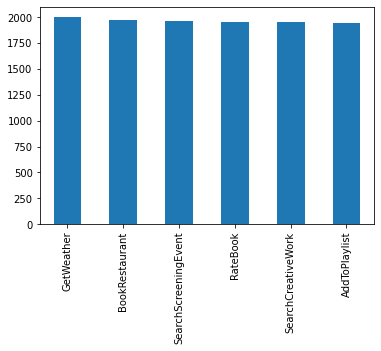

In [34]:
train_data['label'].value_counts().plot(kind='bar')

In [35]:
# 레이블 인코딩. 레이블에 고유한 정수를 부여
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(label_train)

label_train = idx_encode.transform(label_train)    # 주어진 고유한 정수로 변환
label_test = idx_encode.transform(label_test)    # 고유한 정수로 변환

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
print("레이블과 정수의 맵핑 관계 :", label_idx)

레이블과 정수의 맵핑 관계 : {'AddToPlaylist': 0, 'BookRestaurant': 1, 'GetWeather': 2, 'RateBook': 3, 'SearchCreativeWork': 4, 'SearchScreeningEvent': 5}


In [36]:
print(intent_train[:5])
print(label_train[:5])

['add another song to the cita rom ntica playlist', 'add clem burke in my playlist pre party r b jams', 'add live from aragon ballroom to trapeo', 'add unite and win to my night out', 'add track to my digster future hits']
[0 0 0 0 0]


In [38]:
print(intent_test[:5])
print(label_test[:5])

["i 'd like to have this track onto my classical relaxations playlist", 'add the album to my flow espa ol playlist', 'add digging now to my young at heart playlist', 'add this song by too poetic to my piano ballads playlist', 'add this album to old school death metal']
[0 0 0 0 0]


In [39]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(intent_train)
sequences = tokenizer.texts_to_sequences(intent_train)
sequences[:5]    # 상위 5개 샘플 출력

[[11, 191, 61, 4, 1, 4013, 1141, 1572, 15],
 [11, 2624, 1573, 3, 14, 15, 939, 82, 256, 188, 548],
 [11, 187, 42, 2625, 4014, 4, 1968],
 [11, 2626, 22, 2627, 4, 14, 192, 27],
 [11, 92, 4, 14, 651, 520, 195]]

In [40]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print("단어 집합의 크기 :", vocab_size)

단어 집합의 크기 : 9870


문장의 최대 길이 : 35
문장의 평균 길이 : 9.364392396469789


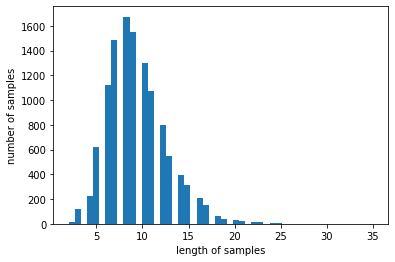

In [41]:
print("문장의 최대 길이 :", max(len(l) for l in sequences))
print("문장의 평균 길이 :", sum(map(len, sequences))/len(sequences))
plt.hist([len(s) for s in sequences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [42]:
max_len = 35

intent_train = pad_sequences(sequences, maxlen=max_len)
label_train = to_categorical(np.asarray(label_train))
print("훈련 데이터의 크기(shape) :", intent_train.shape)
print("훈련 데이터 레이블의 크기(shape) :", label_train.shape)

훈련 데이터의 크기(shape) : (11784, 35)
훈련 데이터 레이블의 크기(shape) : (11784, 6)


In [43]:
print("훈련 데이터의 첫번째 샘플 :", intent_train[0])
print("훈련 데이터의 첫번째 샘플의 레이블 :", label_train[0])

훈련 데이터의 첫번째 샘플 : [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   11  191
   61    4    1 4013 1141 1572   15]
훈련 데이터의 첫번째 샘플의 레이블 : [1. 0. 0. 0. 0. 0.]


In [45]:
# 훈련 데이터 랜덤으로 섞어주기
indices = np.arange(intent_train.shape[0])
np.random.shuffle(indices)
print("랜덤 시퀀스 :", indices)

랜덤 시퀀스 : [ 4570 10031  5732 ...  4788 11652   938]


In [46]:
intent_train = intent_train[indices]
label_train = label_train[indices]

In [47]:
n_of_val = int(0.1 * intent_train.shape[0])
print("검증 데이터의 개수 :", n_of_val)

검증 데이터의 개수 : 1178


In [48]:
x_train = intent_train[:-n_of_val]
y_train = label_train[:-n_of_val]
x_val = intent_train[-n_of_val:]
y_val = label_train[-n_of_val:]
x_test = intent_test
y_test = label_test

In [50]:
print('훈련 데이터의 크기(shape):', x_train.shape)
print('검증 데이터의 크기(shape):', x_val.shape)
print('훈련 데이터 레이블의 크기(shape):', y_train.shape)
print('검증 데이터 레이블의 크기(shape):', y_val.shape)
print('테스트 데이터의 개수 :', len(x_test))
print('테스트 데이터 레이블의 개수 :', len(y_test))

훈련 데이터의 크기(shape): (10606, 35)
검증 데이터의 크기(shape): (1178, 35)
훈련 데이터 레이블의 크기(shape): (10606, 6)
검증 데이터 레이블의 크기(shape): (1178, 6)
테스트 데이터의 개수 : 600
테스트 데이터 레이블의 개수 : 600
